In [1]:
import pymongo
import shapely
import folium
import copy
import random


In [3]:
import pandas as pd
import pymongo
import geopandas as gpd

myclient = pymongo.MongoClient("mongodb://192.168.120.127:27017")
mydb = myclient["tmap"]
data = pd.DataFrame(list(mydb.link.find()))
data.head()

,_added_direction,_id,_nodes,_nodes1,access,bridge,district_id,district_name,geometry_geojson,highway,...,length,maxspeed,name,oneway,osmid,ref,tunnel,u,v,width
0,False,0A9LMyxF480JP0FbQv515,"[2382831780, 3360886858, 2382700813]","[2382831780, 2382700813]",NaN,yes,4591400.0,江干区,"{'type': 'LineString', 'coordinates': [[120.21...",trunk_link,...,83.800,NaN,NaN,True,660407954,NaN,NaN,2382831780,2382700813,NaN
1,True,0AM4JWIZro2lYUpg661x,"[4807783596, 26869728, 183482276]","[4807783596, 183482276]",NaN,NaN,4591385.0,下城区,"{'type': 'LineString', 'coordinates': [[120.18...",unclassified,...,209.185,NaN,NaN,False,17707167,NaN,NaN,4807783596,183482276,NaN
2,False,0Bby2pHggbdlAh558zK9,"[1519371447, 1519371538, 1519371565, 151937148...","[1519371447, 1519371471]",NaN,NaN,4591410.0,西湖区,"{'type': 'LineString', 'coordinates': [[120.10...",unclassified,...,323.031,NaN,NaN,False,138577391,NaN,NaN,1519371447,1519371471,NaN
3,True,0Bby2pHggbdlpT558zKR,"[1519371471, 1519371449, 1519371465, 151937141...","[1519371471, 1519371447]",NaN,NaN,4591410.0,西湖区,"{'type': 'LineString', 'coordinates': [[120.10...",unclassified,...,323.031,NaN,NaN,False,138577391,NaN,NaN,1519371471,1519371447,NaN
4,False,0BbyQKTggbqB9HqDlgYo,"[1519392959, 1519554164, 1519554084, 151955410...","[1519392959, 4886673468]",NaN,NaN,4591410.0,西湖区,"{'type': 'LineString', 'coordinates': [[120.09...",unclassified,...,414.624,30.0,中法路,False,138577237,NaN,NaN,1519392959,4886673468,NaN


In [126]:
data = data.sort_values(by=['length'], ascending=False)
data[data['name']=='机场城市大道'].shape

(8, 26)

In [5]:
data['length'].mean()

217.1831495549958

In [6]:
1.5*(data['length'].quantile(q=0.75)-data['length'].quantile(q=0.25))

340.75200000000007

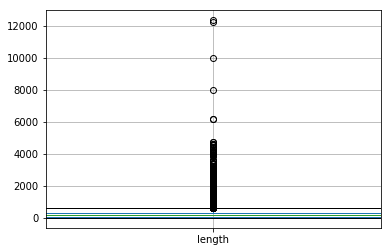

In [27]:
%matplotlib inline
data.boxplot(column = 'length',widths =(2))

In [7]:
import geojson
data['geometry'] = data['geometry_geojson'].apply(shapely.geometry.asShape)
data = data.drop(columns=['_id'])

In [90]:
gdf1 = gpd.GeoDataFrame(data)
gdf1.head()

,_added_direction,_nodes,_nodes1,access,bridge,district_id,district_name,geometry_geojson,highway,id,...,maxspeed,name,oneway,osmid,ref,tunnel,u,v,width,geometry
23031,False,"[5160236076, 5160236116, 5160236115, 516023611...","[5160236076, 5158768814]",NaN,NaN,3221179.0,滨江区,"{'type': 'LineString', 'coordinates': [[120.35...",primary,lWqevL5hW1ekKRU2rBAA0,...,NaN,机场城市大道,True,531431468,NaN,NaN,5160236076,5158768814,NaN,"LINESTRING (120.3539126 30.2136184, 120.353324..."
9082,False,"[4820100209, 5158768808, 5158768809, 515876881...","[4820100209, 5160236078]",NaN,NaN,3221179.0,滨江区,"{'type': 'LineString', 'coordinates': [[120.22...",primary,E9EQoM2tr0A5YzHBzkLR4,...,NaN,机场城市大道,True,531431467,NaN,NaN,4820100209,5160236078,NaN,"LINESTRING (120.2279977 30.2198489, 120.228171..."
5335,False,"[3035358452, 3035357588, 5596048378, 289068070...","[3035358452, 2890680730]",NaN,NaN,NaN,,"{'type': 'LineString', 'coordinates': [[120.33...",primary,7nQpJOoCjlWo9RUon4xD6,...,NaN,建设四路,True,505097816,NaN,NaN,3035358452,2890680730,NaN,"LINESTRING (120.3344389 30.2006057, 120.334301..."
15466,False,"[4087229825, 5634394752, 1668711812, 289068074...","[4087229825, 1728952765]",NaN,NaN,NaN,,"{'type': 'LineString', 'coordinates': [[120.23...",primary,VdLq3Zf7w3EqkTZMzeE1,...,NaN,建设四路,True,113467440,NaN,NaN,4087229825,1728952765,NaN,"LINESTRING (120.2304275 30.2144327, 120.230672..."
22121,False,"[5598294227, 5956192106, 5541665318, 554166531...","[5598294227, 3373270288]",NaN,yes,4591384.0,拱墅区,"{'type': 'LineString', 'coordinates': [[120.24...",trunk,k9ez8vyH7Ol49jHOK1jEy,...,NaN,秋石高架,True,658403039,NaN,NaN,5598294227,3373270288,NaN,"LINESTRING (120.2454129 30.4243771, 120.236819..."


In [7]:
tips = folium.features.GeoJsonTooltip(fields=['name'])

In [8]:
highlight_function = lambda x:{'color': "#000000"}

In [9]:
color_func = lambda x:{'color': "#%06x" % random.randint(0, 0xFFFFFF),'opacity':0.5}

In [9]:
gdf2 = gdf1.iloc[:300]

In [11]:
m = folium.Map([30.186518,120.176028], zoom_start=13)

folium.GeoJson(gdf2.__geo_interface__,style_function=color_func,tooltip=tips,highlight_function=highlight_function).add_to(m)

m

In [171]:
def divid_edge_row(row):
    nodes = row['_nodes'].iloc[0]

    def divid_nodes_array(nodes):
        node_init, index_init = nodes[0], 0
        nodes_array = [node_init]
        for i in range(1, len(nodes)):
            point_init = row.iloc[0]['geometry_geojson']['coordinates'][index_init][::-1]
            point_end = row.iloc[0]['geometry_geojson']['coordinates'][i][::-1]
            if get_distance(point_init, point_end) > 300 and i != len(nodes):
                nodes_array.append(nodes[i])
                index_init = i
            elif get_distance(point_init, point_end) < 300 and i != len(nodes):
                pass
            elif i == len(nodes):
                nodes_array.append(nodes[i])
        return nodes_array

    # the edge name should be single and nodes should not be closed

    nodes_to_bedivid = divid_nodes_array(nodes)
    edge_divided = pd.DataFrame()
    if len(nodes_to_bedivid) > 2:
        for j in range(len(nodes_to_bedivid) - 1):
            link_df_rowcp = row.copy()
            link_df_rowcp['u'], link_df_rowcp['v'] = nodes_to_bedivid[j], nodes_to_bedivid[j + 1]
            link_df_rowcp['id1'] = gen_osm_id(*link_df_rowcp['osmid'], link_df_rowcp['u'],
                                              link_df_rowcp['v'])
            index1, index2 = nodes.index(nodes_to_bedivid[j]), nodes.index(nodes_to_bedivid[j + 1])
            link_df_rowcp['_nodes'] = nodes[index1:(index2 + 1)]
            link_df_rowcp['geometry_json'] = calc_way_geometry_geojson(link_df_rowcp['_nodes'])
            link_df_rowcp['geometry'] = link_df_rowcp['geometry_geojson'].apply(shapely.geometry.asShape)
            node_front = link_df_rowcp['geometry_json']['coordinates'][0][::-1]
            node_end = link_df_rowcp['geometry_json']['coordinates'][-1][::-1]
            link_df_rowcp['length'] = get_distance(node_front, node_end)
            link_df_rowcp['id2'] = gen_osm_id(*link_df_rowcp['_nodes'])
            link_df_rowcp = pd.DataFrame(link_df_rowcp).T
            edge_divided = pd.concat([edge_divided, link_df_rowcp])
        return edge_divided

    return pd.DataFrame(row).T

In [114]:
def extra_nodes(row):
    nodes = row['_nodes'].iloc[0]

    def divid_nodes_array(nodes):
        node_init, index_init = nodes[0], 0
        nodes_array = [node_init]
        nodes_array_dict ={}
        for i in range(1, len(nodes)):
            point_init = row.iloc[0]['geometry_geojson']['coordinates'][index_init][::-1]
            point_end = row.iloc[0]['geometry_geojson']['coordinates'][i][::-1]
            if get_distance(point_init, point_end) > 350 and i != len(nodes):
                nodes_array.append(nodes[i])
                nodes_array_dict[nodes[i]] = point_end
                index_init = i
            elif get_distance(point_init, point_end) < 350 and i != len(nodes):
                pass
            elif i == len(nodes):
                nodes_array.append(nodes[i])
        return nodes_array, nodes_array_dict

    # the edge name should be single and nodes should not be closed

    nodes_to_bedivid, nodes_dict = divid_nodes_array(nodes)
    nodes_to_bedivid = nodes_to_bedivid[1:-1]
    edge_divided = pd.DataFrame(columns=['osmid', 'x', 'y'])
    if nodes_to_bedivid:
        for item in nodes_to_bedivid:
            new_row = pd.DataFrame({'osmid' :item, 'x':nodes_dict[item][0], 'y':nodes_dict[item][1]}, index=[int(item)])
            edge_divided = edge_divided.append(new_row)
        edge_divided['highway'],edge_divided['ref'] = None, None

        return edge_divided

    return None

In [11]:
import geopy.distance
def gen_osm_id(*args):
    hashid = hashids.encode(*args)
    return hashid

def get_distance(origin_point, new_point):
    dist = geopy.distance.distance(tuple(origin_point), tuple(new_point)).m
    return dist

In [12]:
import hashids
from hashids import Hashids
hashids = Hashids(salt='this is my salt 1')


In [115]:
gdf2.head(1)['length']

23031    12338.754
Name: length, dtype: float64

In [116]:
processed = extra_nodes(gdf2.head(1))
processed.shape

(26, 5)

In [15]:
districts = [
    {'city': '杭州市', 'district': '上城区'},
    {'city': '杭州市', 'district': '下城区'},
    {'city': '杭州市', 'district': '拱墅区'},
    {'city': '杭州市', 'district': '西湖区'},
    {'city': '杭州市', 'district': '江干区'},
    {'city': '杭州市', 'district': '滨江区'},
]

In [16]:
def get_district_gdf(districts):
    district_docs = []
    for district in districts:
        doc = mydb.district.find_one(district)
        district_docs.append(doc)
    district_gdf = pd.DataFrame(district_docs)
    return district_gdf


def osm_node_way_df_from_response_jsons(response_jsons):
    nodes, paths = {}, {}
    for osm_data in response_jsons:
        nodes_temp, paths_temp = osmnx.parse_osm_nodes_paths(osm_data)
        for key, value in nodes_temp.items():
            nodes[key] = value
        for key, value in paths_temp.items():
            paths[key] = value
    nodes_df = pd.DataFrame.from_dict(nodes, orient='index')
    ways_df = pd.DataFrame.from_dict(paths, orient='index')
    return nodes_df, ways_df

In [17]:
import osmnx
district_gdf = get_district_gdf(districts)
district_gdf = gpd.GeoDataFrame(district_gdf)
district_gdf['polygon'] = district_gdf['geojson'].apply(shapely.geometry.shape)
district_gdf = district_gdf.set_geometry('polygon', crs='EPSG:4326')
polygon_unary = district_gdf.polygon.unary_union
osm_json = osmnx.osm_net_download(polygon=polygon_unary, network_type='drive')
osm_node_df, osm_way_df = osm_node_way_df_from_response_jsons(osm_json)

In [66]:
network_type = 'drive'
main_graph = osmnx.core.create_graph(osm_json,network_type=network_type)

In [24]:
gdf1.head()['geometry']

23031    LINESTRING (120.3539126 30.2136184, 120.353324...
9082     LINESTRING (120.2279977 30.2198489, 120.228171...
5335     LINESTRING (120.3344389 30.2006057, 120.334301...
15466    LINESTRING (120.2304275 30.2144327, 120.230672...
22121    LINESTRING (120.2454129 30.4243771, 120.236819...
Name: geometry, dtype: object

In [134]:
def calc_node_geometry_geojson(noderow):
    node_geometry_geojson = geojson.Point((noderow['x'], noderow['y']))
    return node_geometry_geojson


def calc_way_geometry_geojson(nodes):
    def get_node_xy(node_id):
        node = osm_node_df.loc[node_id]
        return node['x'], node['y']

    way_geometry_geojson = geojson.LineString([get_node_xy(node_id) for node_id in nodes])
    return way_geometry_geojson

In [26]:
import geojson

In [95]:
import json
gdf2 = gpd.GeoDataFrame(gdf2)
gdf2.head(1).iloc[0]['geometry_geojson']

{'coordinates': [[120.3539126, 30.2136184],
  [120.3533248, 30.2136871],
  [120.3523155, 30.2138047],
  [120.3494315, 30.214202],
  [120.346889, 30.2146132],
  [120.3430276, 30.2152159],
  [120.3388282, 30.215842],
  [120.3386801, 30.2158641],
  [120.3346469, 30.2164654],
  [120.3291978, 30.2172984],
  [120.3282456, 30.2174428],
  [120.3251265, 30.2179158],
  [120.3234084, 30.2181852],
  [120.3211856, 30.2185184],
  [120.3176251, 30.2190629],
  [120.3147215, 30.2195033],
  [120.309295, 30.2203166],
  [120.3048256, 30.2209858],
  [120.303521, 30.2211841],
  [120.2981601, 30.2219991],
  [120.2947697, 30.2225119],
  [120.294612, 30.2225458],
  [120.2923125, 30.2228693],
  [120.2883377, 30.2235014],
  [120.2875438, 30.2236532],
  [120.2863896, 30.2238196],
  [120.2861258, 30.2238681],
  [120.2842997, 30.2241455],
  [120.2821815, 30.2244651],
  [120.2755395, 30.2254688],
  [120.2754647, 30.2254788],
  [120.2721866, 30.2259684],
  [120.2719185, 30.226003],
  [120.2691732, 30.2264206],
  [120

In [96]:
gdf2.head(1)['_nodes']

23031    [5160236076, 5160236116, 5160236115, 516023611...
Name: _nodes, dtype: object

In [119]:
def extra_nodes_tuple(row):
    nodes = row['_nodes']

    def divid_nodes_array(nodes):
        node_init, index_init = nodes[0], 0
        nodes_array = [node_init]
        nodes_array_dict ={}
        for i in range(1, len(nodes)):
            point_init = row['geometry_geojson']['coordinates'][index_init][::-1]
            point_end = row['geometry_geojson']['coordinates'][i][::-1]
            if get_distance(point_init, point_end) > 350 and i != len(nodes):
                nodes_array.append(nodes[i])
                nodes_array_dict[nodes[i]] = point_end
                index_init = i
            elif get_distance(point_init, point_end) < 350 and i != len(nodes):
                pass
            elif i == len(nodes):
                nodes_array.append(nodes[i])
        return nodes_array, nodes_array_dict

    # the edge name should be single and nodes should not be closed

    nodes_to_bedivid, nodes_dict = divid_nodes_array(nodes)
    nodes_to_bedivid = nodes_to_bedivid[1:-1]
    return tuple(nodes_to_bedivid)


In [120]:
added_nodes_tuple = ()

for index, row in gdf2.iterrows():
    row_divid = extra_nodes_tuple(row)
    print('row{} is done...'.format(index))
    added_nodes_update += row_divid

row23031 is done...
row9082 is done...
row5335 is done...
row15466 is done...
row22121 is done...
row13166 is done...
row9815 is done...
row29233 is done...
row11657 is done...
row13648 is done...
row24610 is done...
row1908 is done...
row29417 is done...
row8712 is done...
row2371 is done...
row20313 is done...
row9829 is done...
row2121 is done...
row1598 is done...
row28116 is done...
row20680 is done...
row14032 is done...
row18279 is done...
row3850 is done...
row26800 is done...
row14172 is done...
row17695 is done...
row3290 is done...
row8544 is done...
row18783 is done...
row3832 is done...
row2602 is done...
row15725 is done...
row27901 is done...
row22118 is done...
row28660 is done...
row6189 is done...
row27812 is done...
row17293 is done...
row19512 is done...
row16289 is done...
row20927 is done...
row10959 is done...
row4850 is done...
row21243 is done...
row16841 is done...
row17911 is done...
row21062 is done...
row25295 is done...
row24415 is done...
row4291 is done.

In [121]:
added_nodes_update

(5160236117,
 5160236112,
 5160237159,
 5160236111,
 5160236110,
 5160236109,
 5160236107,
 5160236105,
 5160236104,
 5160236036,
 5160236103,
 5160236102,
 5160236101,
 5158769805,
 5158769804,
 5158769801,
 3594275680,
 5158769757,
 5158769751,
 5158769768,
 5158769745,
 5158769568,
 5158769565,
 5158769540,
 5158769535,
 5158768819,
 5782244450,
 5158769527,
 5158769547,
 5158769550,
 5158769554,
 5158769600,
 5572714399,
 5158769605,
 5158769611,
 5158769788,
 5158769791,
 5158769793,
 5264998032,
 5158769795,
 5160236025,
 5160236027,
 2883842746,
 5160236033,
 5160236047,
 5160236091,
 5160236049,
 5160237177,
 5160236050,
 5596048378,
 5110703791,
 5025350492,
 2890680708,
 2930537009,
 5596048335,
 2930532605,
 5595976767,
 2890680713,
 2890680714,
 5559175308,
 4145409371,
 2890711250,
 2890711246,
 2890711267,
 2890711242,
 2890711240,
 5064096683,
 2890680725,
 5167373381,
 2569264937,
 2395875407,
 2569264934,
 2395874702,
 1286463174,
 5559175277,
 1286462916,
 1286463015,

In [78]:
from shapely.geometry import LineString, Point
from osmnx import log, is_simplified, lg, build_path
import time
def simplify_graph_ext1(G, strict=False,other_endpoints=None):
    """
    y:
    logicaly.strict=True not cause any different result

    Simplify a graph's topology by removing all nodes that are not intersections
    or dead-ends.

    Create an edge directly between the end points that encapsulate them,
    but retain the geometry of the original edges, saved as attribute in new
    edge.

    Parameters
    ----------
    G : networkx multidigraph
    strict : bool
        if False, allow nodes to be end points even if they fail all other rules
        but have edges with different OSM IDs

    Returns
    -------
    networkx multidigraph
    """
    if other_endpoints is None:
        other_endpoints = []

    if is_simplified(G):
        raise Exception('This graph has already been simplified, cannot simplify it again.')

    log('Begin topologically simplifying the graph...')
    G = G.copy()
    initial_node_count = len(list(G.nodes()))
    initial_edge_count = len(list(G.edges()))
    all_nodes_to_remove = []
    all_edges_to_add = []

    # construct a list of all the paths that need to be simplified
    paths = get_paths_to_simplify(G, strict=strict,other_endpoints=other_endpoints)

    start_time = time.time()
    for path in paths:

        # add the interstitial edges we're removing to a list so we can retain
        # their spatial geometry
        edge_attributes = {}
        for u, v in zip(path[:-1], path[1:]):

            # there shouldn't be multiple edges between interstitial nodes
            if not G.number_of_edges(u, v) == 1:
                log('Multiple edges between "{}" and "{}" found when simplifying'.format(u, v), level=lg.WARNING)

            # the only element in this list as long as above check is True
            # (MultiGraphs use keys (the 0 here), indexed with ints from 0 and
            # up)
            edge = G.edges[u, v, 0]
            for key in edge:
                if key in edge_attributes:
                    # if this key already exists in the dict, append it to the
                    # value list
                    edge_attributes[key].append(edge[key])
                else:
                    # if this key doesn't already exist, set the value to a list
                    # containing the one value
                    edge_attributes[key] = [edge[key]]

        for key in edge_attributes:
            # don't touch the length attribute, we'll sum it at the end
            if len(set(edge_attributes[key])) == 1 and not key == 'length':
                # if there's only 1 unique value in this attribute list,
                # consolidate it to the single value (the zero-th)
                edge_attributes[key] = edge_attributes[key][0]
            elif not key == 'length':
                # otherwise, if there are multiple values, keep one of each value
                edge_attributes[key] = list(set(edge_attributes[key]))

        # construct the geometry and sum the lengths of the segments
        edge_attributes['geometry'] = LineString([Point((G.nodes[node]['x'], G.nodes[node]['y'])) for node in path])
        edge_attributes['length'] = sum(edge_attributes['length'])
        # by y
        edge_attributes['_nodes'] = [node for node in path]

        # add the nodes and edges to their lists for processing at the end
        all_nodes_to_remove.extend(path[1:-1])
        all_edges_to_add.append({'origin':path[0],
                                 'destination':path[-1],
                                 'attr_dict':edge_attributes})

    # for each edge to add in the list we assembled, create a new edge between
    # the origin and destination
    for edge in all_edges_to_add:
        G.add_edge(edge['origin'], edge['destination'], **edge['attr_dict'])

    # finally remove all the interstitial nodes between the new edges
    G.remove_nodes_from(set(all_nodes_to_remove))

    G.graph['simplified'] = True

    msg = 'Simplified graph (from {:,} to {:,} nodes and from {:,} to {:,} edges) in {:,.2f} seconds'
    log(msg.format(initial_node_count, len(list(G.nodes())), initial_edge_count, len(list(G.edges())), time.time()-start_time))
    return G

In [72]:
def get_paths_to_simplify(G, strict=True, other_endpoints=None):
    """
    Create a list of all the paths to be simplified between endpoint nodes.

    The path is ordered from the first endpoint, through the interstitial nodes,
    to the second endpoint. If your street network is in a rural area with many
    interstitial nodes between true edge endpoints, you may want to increase
    your system's recursion limit to avoid recursion errors.

    Parameters
    ----------
    G : networkx multidigraph
    strict : bool
        if False, allow nodes to be end points even if they fail all other rules
        but have edges with different OSM IDs

    Returns
    -------
    paths_to_simplify : list
    """
    if other_endpoints is None:
        other_endpoints = []


    # first identify all the nodes that are endpoints
    start_time = time.time()
    endpoints = set([node for node in G.nodes() if is_endpoint(G, node, strict=strict,other_endpoints=other_endpoints)])
    log('Identified {:,} edge endpoints in {:,.2f} seconds'.format(len(endpoints), time.time()-start_time))

    start_time = time.time()
    paths_to_simplify = []

    # for each endpoint node, look at each of its successor nodes
    for node in endpoints:
        for successor in G.successors(node):
            if successor not in endpoints:
                # if the successor is not an endpoint, build a path from the
                # endpoint node to the next endpoint node
                try:
                    path = build_path(G, successor, endpoints, path=[node, successor])
                    paths_to_simplify.append(path)
                except RuntimeError:
                    log('Recursion error: exceeded max depth, moving on to next endpoint successor', level=lg.WARNING)
                    # recursion errors occur if some connected component is a
                    # self-contained ring in which all nodes are not end points.
                    # could also occur in extremely long street segments (eg, in
                    # rural areas) with too many nodes between true endpoints.
                    # handle it by just ignoring that component and letting its
                    # topology remain intact (this should be a rare occurrence)
                    # RuntimeError is what Python <3.5 will throw, Py3.5+ throws
                    # RecursionError but it is a subtype of RuntimeError so it
                    # still gets handled

    log('Constructed all paths to simplify in {:,.2f} seconds'.format(time.time()-start_time))
    return paths_to_simplify

In [76]:

def is_endpoint(G, node, strict=True, other_endpoints=None):
    """
    Return True if the node is a "real" endpoint of an edge in the network, \
    otherwise False. OSM data includes lots of nodes that exist only as points \
    to help streets bend around curves. An end point is a node that either: \
    1) is its own neighbor, ie, it self-loops. \
    2) or, has no incoming edges or no outgoing edges, ie, all its incident \
        edges point inward or all its incident edges point outward. \
    3) or, it does not have exactly two neighbors and degree of 2 or 4. \
    4) or, if strict mode is false, if its edges have different OSM IDs. \

    Parameters
    ----------
    G : networkx multidigraph

    node : int
        the node to examine
    strict : bool
        if False, allow nodes to be end points even if they fail all other rules \
        but have edges with different OSM IDs

    Returns
    -------
    bool

    """
    if other_endpoints is None:
        other_endpoints = []

    neighbors = set(list(G.predecessors(node)) + list(G.successors(node)))
    n = len(neighbors)
    d = G.degree(node)

    # y
    # if a node is osm u,v point,it's endpoint,use this to cut edge
    # if node in G.nodes():
    #     return True
    # pre calc end_points to cut.
    if node in other_endpoints:
        print('123')
        return True

    if node in neighbors:
        # if the node appears in its list of neighbors, it self-loops. this is
        # always an endpoint.
        return True

    # if node has no incoming edges or no outgoing edges, it must be an endpoint
    elif G.out_degree(node)==0 or G.in_degree(node)==0:
        return True

    elif not (n==2 and (d==2 or d==4)):
        # else, if it does NOT have 2 neighbors AND either 2 or 4 directed
        # edges, it is an endpoint. either it has 1 or 3+ neighbors, in which
        # case it is a dead-end or an intersection of multiple streets or it has
        # 2 neighbors but 3 degree (indicating a change from oneway to twoway)
        # or more than 4 degree (indicating a parallel edge) and thus is an
        # endpoint
        return True

    elif not strict:
        # non-strict mode
        osmids = []

        # add all the edge OSM IDs for incoming edges
        for u in G.predecessors(node):
            for key in G[u][node]:
                osmids.append(G.edges[u, node, key]['osmid'])

        # add all the edge OSM IDs for outgoing edges
        for v in G.successors(node):
            for key in G[node][v]:
                osmids.append(G.edges[node, v, key]['osmid'])

        # if there is more than 1 OSM ID in the list of edge OSM IDs then it is
        # an endpoint, if not, it isn't
        return len(set(osmids)) > 1

    else:
        # if none of the preceding rules returned true, then it is not an endpoint
        return False

In [123]:
graph_cut = simplify_graph_ext1(main_graph,strict=False,other_endpoints=added_nodes_update)

123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123


In [141]:
osm_way_uv_point = osm_way_df['nodes'].map(lambda x: (x[0],x[-1])).sum()
len(osm_way_uv_point)

18486

In [142]:
added_nodes_update2 = added_nodes_update+osm_way_uv_point
len(added_nodes_update2)

20300

In [143]:
graph_cut2 = simplify_graph_ext1(main_graph,strict=False,other_endpoints=added_nodes_update2)

123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123


123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123


123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123


123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123


123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123


123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123
123


In [144]:
graph_cut_node,graph_cut_edge = osmnx.save_load.graph_to_gdfs(graph_cut2, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)

In [145]:
graph_cut_edge = graph_cut_edge.sort_values(by=['length'], ascending=False)
graph_cut_edge[graph_cut_edge['name']=='机场城市大道'].shape

(57, 18)

In [146]:
graph_cut_edge

,_nodes,access,bridge,geometry,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,ref,tunnel,u,v,width
820,NaN,NaN,yes,"LINESTRING (120.3586551 30.2428851, 120.354107...",motorway,NaN,0,3,2367.400,NaN,下沙大桥,True,643216307,G60,NaN,1667371093,268120311,NaN
17787,"[268164596, 268164597, 1667371092]",NaN,yes,"LINESTRING (120.3539376 30.2637867, 120.358067...",motorway,NaN,0,3,2365.717,NaN,下沙大桥,True,643216306,G60,NaN,268164596,1667371092,NaN
23876,"[3061029220, 271898231, 271898706, 271898743]",NaN,NaN,"LINESTRING (120.0557193 30.184435, 120.0562342...",motorway,NaN,0,2,2295.359,NaN,绕城高速 Ràochéng Gāosù,True,301933278,G25 G2501,NaN,3061029220,271898743,NaN
21672,"[269972804, 269972805, 269972815, 3061029221]",NaN,NaN,"LINESTRING (120.0711642 30.1688083, 120.057273...",motorway,NaN,0,2,2285.023,NaN,绕城高速,True,367058129,G25 G2501,NaN,269972804,3061029221,NaN
14489,"[5067831496, 5067831491, 5067831484, 5067831485]",NaN,NaN,"LINESTRING (120.1083765 30.2894136, 120.109192...",trunk,NaN,0,NaN,2238.750,NaN,文一路隧道,True,549707876,NaN,yes,5067831496,5067831485,NaN
14475,"[5067831481, 5067831483, 5067831503]",NaN,NaN,"LINESTRING (120.1316272 30.290763, 120.1292983...",trunk,NaN,0,NaN,2161.721,NaN,文一路隧道,True,519779395,NaN,yes,5067831481,5067831503,NaN
21254,NaN,NaN,NaN,"LINESTRING (120.128877 30.1276938, 120.148999 ...",motorway,NaN,0,2,2046.401,NaN,绕城高速 Ràochéng Gāosù,True,301933281,G2501,NaN,1338863622,1338863231,NaN
12323,NaN,NaN,NaN,"LINESTRING (120.3912397 30.3841478, 120.380925...",motorway,NaN,0,2,2029.631,NaN,沪昆高速,True,345412046,G60,NaN,1899023880,319288804,NaN
12319,NaN,NaN,NaN,"LINESTRING (120.3810823 30.3681768, 120.391047...",motorway,NaN,0,3,1963.730,NaN,沪昆高速,True,345420721,G60,NaN,1899023868,1899023878,NaN
23685,NaN,NaN,NaN,"LINESTRING (120.3466085 30.3516955, 120.366091...",unclassified,NaN,0,NaN,1873.353,NaN,五一路,False,570875606,NaN,NaN,5208185145,5208185146,NaN


In [132]:
gdf2.head().columns

Index(['_added_direction', '_nodes', '_nodes1', 'access', 'bridge',
       'district_id', 'district_name', 'geometry_geojson', 'highway', 'id',
       'id1', 'id2', 'junction', 'key', 'lanes', 'length', 'maxspeed', 'name',
       'oneway', 'osmid', 'ref', 'tunnel', 'u', 'v', 'width', 'geometry'],
      dtype='object')

In [148]:
gdf2.head().__geo_interface__

{'bbox': (120.1946943, 30.2006057, 120.3539126, 30.4243771),
 'features': [{'bbox': (120.2280545, 30.2136184, 120.3539126, 30.2266235),
   'geometry': {'coordinates': ((120.3539126, 30.2136184),
     (120.3533248, 30.2136871),
     (120.3523155, 30.2138047),
     (120.3494315, 30.214202),
     (120.346889, 30.2146132),
     (120.3430276, 30.2152159),
     (120.3388282, 30.215842),
     (120.3386801, 30.2158641),
     (120.3346469, 30.2164654),
     (120.3291978, 30.2172984),
     (120.3282456, 30.2174428),
     (120.3251265, 30.2179158),
     (120.3234084, 30.2181852),
     (120.3211856, 30.2185184),
     (120.3176251, 30.2190629),
     (120.3147215, 30.2195033),
     (120.309295, 30.2203166),
     (120.3048256, 30.2209858),
     (120.303521, 30.2211841),
     (120.2981601, 30.2219991),
     (120.2947697, 30.2225119),
     (120.294612, 30.2225458),
     (120.2923125, 30.2228693),
     (120.2883377, 30.2235014),
     (120.2875438, 30.2236532),
     (120.2863896, 30.2238196),
     (120.2

In [149]:
graph_cut_edge.__geo_interface__

{'bbox': (119.9752733, 30.077738, 120.4293368, 30.4243771),
 'features': [{'bbox': (120.354107, 30.2428851, 120.3586551, 30.26381),
   'geometry': {'coordinates': ((120.3586551, 30.2428851),
     (120.354107, 30.26381)),
    'type': 'LineString'},
   'id': '820',
   'properties': {'_nodes': None,
    'access': None,
    'bridge': 'yes',
    'highway': 'motorway',
    'junction': None,
    'key': 0,
    'lanes': '3',
    'length': 2367.4,
    'maxspeed': None,
    'name': '下沙大桥',
    'oneway': True,
    'osmid': 643216307,
    'ref': 'G60',
    'tunnel': None,
    'u': 1667371093,
    'v': 268120311,
    'width': None},
   'type': 'Feature'},
  {'bbox': (120.3539376, 30.2428785, 120.3584933, 30.2637867),
   'geometry': {'coordinates': ((120.3539376, 30.2637867),
     (120.3580678, 30.2449144),
     (120.3584933, 30.2428785)),
    'type': 'LineString'},
   'id': '17787',
   'properties': {'_nodes': [268164596, 268164597, 1667371092],
    'access': None,
    'bridge': 'yes',
    'highway'

In [153]:
graph_cut_edge_shorten = graph_cut_edge[:1000]

In [154]:
m = folium.Map([30.186518,120.176028], zoom_start=11)
color_func = lambda x:{'color': "#%06x" % random.randint(0, 0xFFFFFF),'opacity':0.5}
highlight_function = lambda x:{'color': "#000000"}
tips = folium.features.GeoJsonTooltip(fields=['name'])
folium.GeoJson(graph_cut_edge_shorten.__geo_interface__,style_function=color_func,tooltip=tips,highlight_function=highlight_function).add_to(m)
m